## Подготовка данных

In [3]:
import pickle
with open("../results/dnn/ecoli_10_10000_1000.data", "rb") as file:
    data_list = pickle.load(file)
data = data_list[0]

## Простейшая сверточная модель с тремя фильтрами

In [ ]:
from cnn_models import *
model, history = run_cnn_model_1(data, 2)

In [19]:
model.evaluate(data.test1, data.test_ans)

1000/1000 [==============================] - 0s 183us/step


[1.3678460912704469, 0.309]

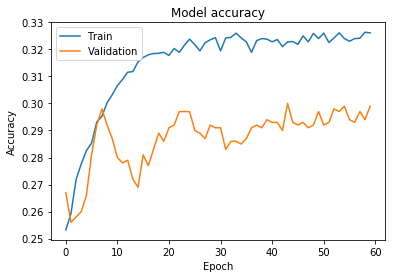

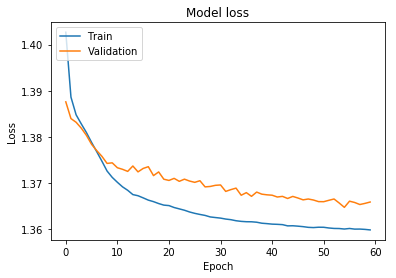

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
with open("../results/dnn/dnn_model_1_all_runs_10_p2.pyob", "rb") as file:
    (test_accs_1, train_accs_1) = pickle.load(file)  
print(len(test_accs_1))

In [ ]:
import time
test_accs = [] 
train_accs = []
t = 0

for i in range(10):
    print(i, t)

    data = data_list[i]
    start = time.time()
    model, history = run_cnn_model_1(data, 2)
    t += time.time() - start

    acc = model.evaluate(data.test1, data.test_ans, verbose=0)[1]
    acc_train = model.evaluate(data.train1, data.train_ans, verbose=0)[1]

    test_accs.append(acc)
    train_accs.append(acc_train)

0 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 8, 3)              39        
_________________________________________________________________
flatten_7 (Flatten)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 100       
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 5s 500us/step - loss: 1.4160 - acc: 0.2543 - val_loss: 1.3987 - val_acc: 0.2440
Epoch 2/100
9000/9000 [==============================] - 4s 444us/step - loss: 1.3910 - acc: 0.2600 - val_loss: 1.3916 - val_acc: 0.2550
Epoch 3/100
9000/9000 [==============================] - 4s 431us/step - loss: 1.3

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([test_accs_1, train_accs_1])
plt.xticks([1,2], ('test', 'train'))
plt.ylabel("accuracy")
plt.show()

In [ ]:
import scipy.stats
# scipy.stats.wilcoxon(test_accs_1, train_accs_1)
scipy.stats.mannwhitneyu(test_accs_1, train_accs_1)